In [1]:
import torch
import torch.nn as nn
from torchvision import models
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
classes = [
    "No Finding", "Atelectasis", "Cardiomegaly", "Effusion", "Infiltration",
    "Mass", "Nodule", "Pneumonia", "Pneumothorax", "Consolidation",
    "Edema", "Emphysema", "Fibrosis", "Pleural_Thickening", "Hernia"
]
# Model Loading with Auto-Detection
def load_model(model_name, model_path):
    print(f"🔹 Loading {model_name} from {model_path}...")

    #  (.ts)
    if model_path.endswith(".ts") or model_path.endswith("_optimized_trt.pth"):
        try:
            model = torch.jit.load(model_path, map_location=device)
            model.eval()
            print(f"✅ Loaded {model_name} as TorchScript/TensorRT model.")
            return model
        except Exception as e:
            print(f"🚨 Error loading {model_name} as TorchScript: {e}")
            print("⚠ Possible Fix: Re-export the model using `torch.jit.save()`")
            raise e

    #  (.pth)
    try:
        if "DenseNet121" in model_name:
            model = models.densenet121(weights=None)
            model.classifier = nn.Linear(model.classifier.in_features, len(classes))

        elif "ViT" in model_name:
            model = models.vit_b_16(weights=None)
            model.heads.head = nn.Linear(model.heads.head.in_features, len(classes))

        elif "EfficientNet_B3" in model_name:
            model = models.efficientnet_b3(weights=None)
            model.classifier[-1] = nn.Linear(model.classifier[-1].in_features, len(classes))

        elif "EfficientNet_B0" in model_name:
            model = models.efficientnet_b0(weights=None)
            model.classifier[-1] = nn.Linear(model.classifier[-1].in_features, len(classes))

        else:
            raise ValueError(f"❌ Unknown model name: {model_name}")

        state_dict = torch.load(model_path, map_location=device)
        if isinstance(state_dict, dict):  
            model.load_state_dict(state_dict)
            model = model.to(device)
            model.eval()
            print(f"✅ Successfully loaded {model_name} (PyTorch Model).")
            return model
        else:
            raise RuntimeError("⚠ The file is not a valid PyTorch state_dict.")

    except RuntimeError as e:
        print(f"🚨 RuntimeError loading {model_name}: {e}")
        print("⚠ Possible Fix: Ensure the model is a valid PyTorch state_dict.")
        raise e
    except Exception as e:
        print(f"🚨 Unexpected error loading {model_name}: {e}")
        raise e

model_paths = {
    "DenseNet121": "/content/DenseNet121_optimized_trt.ts",
    "ViT_Base": "/content/ViT_Base_optimized_trt.ts",
    # "EfficientNet_B3": "EfficientNet_B3_fixed.ts",  # 
    "EfficientNet_B0": "/content/EfficientNet_B0_best_93.44.pth",
}


print(f"📂 Models to Load: {model_paths.keys()}")


models_dict = {name: load_model(name, path) for name, path in model_paths.items()}


📂 Models to Load: dict_keys(['DenseNet121', 'ViT_Base', 'EfficientNet_B0'])
🔹 Loading DenseNet121 from /content/DenseNet121_optimized_trt.ts...
✅ Loaded DenseNet121 as TorchScript/TensorRT model.
🔹 Loading ViT_Base from /content/ViT_Base_optimized_trt.ts...
✅ Loaded ViT_Base as TorchScript/TensorRT model.
🔹 Loading EfficientNet_B0 from /content/EfficientNet_B0_best_93.44.pth...
✅ Successfully loaded EfficientNet_B0 (PyTorch Model).


<ipython-input-1-59633e185a8e>:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(model_path, map_location=device)


In [4]:
pip install torch torchvision datasets transformers torch_xla[tpu] --quiet

In [9]:
pip install torch torchvision datasets transformers torch_xla

✅ Keeping Google Colab session alive...


In [11]:
import torch
model_path = "/content/DenseNet121_pruned_quantized.ts"
model = torch.jit.load(model_path, map_location="cpu")  
new_model_path = "/content/DenseNet121_pruned_quantized.pth"
torch.save(model.state_dict(), new_model_path)

print(f" Successfully converted {model_path} to {new_model_path}")


✅ Successfully converted /content/DenseNet121_pruned_quantized.ts to /content/DenseNet121_pruned_quantized.pth


In [14]:
import torch
model_path = "/content/ViT_Base_optimized_trt.ts"
model = torch.jit.load(model_path, map_location="cpu")  # Load on CPU first
new_model_path = "/content/ViT_Base_optimized_trt.pth"
torch.save(model.state_dict(), new_model_path)

print(f"✅ Successfully converted {model_path} to {new_model_path}")

✅ Successfully converted /content/ViT_Base_optimized_trt.ts to /content/ViT_Base_optimized_trt.pth


✅ Keeping Google Colab session alive...
📂 Loading NLMCXR dataset from Hugging Face...
⚠ No valid labels found in report: status post left mastectomy. heart size normal. lungs are clear....
⚠ No valid labels found in report: no acute findings. cardiac and mediastinal contours are within normal limits. the lungs are clear. b...
⚠ No valid labels found in report: negative chest x-xxxx. cardiac and mediastinal contours are within normal limits. the lungs are clea...
⚠ No valid labels found in report: no acute disease. the heart is top normal in size. the mediastinum is unremarkable. the lungs are cl...
⚠ No valid labels found in report: no acute disease. the heart is top normal in size. the mediastinum is unremarkable. the lungs are cl...
⚠ No valid labels found in report: clear lungs. no discrete adenopathy or significant scarring. no active pulmonary disease....
⚠ No valid labels found in report: old granulomatous disease. no acute pulmonary disease. there is a calcified granuloma in the

<ipython-input-25-5bd073e06f88>:130: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(model_path, map_location="cpu")


✅ Successfully loaded DenseNet121 (PyTorch Model).
🔹 Loading ViT_Base from /content/ViT_Base_optimized_trt.pth...
✅ Successfully loaded ViT_Base (PyTorch Model).
🔹 Loading EfficientNet_B0 from /content/EfficientNet_B0_best_93.44.pth...
✅ Successfully loaded EfficientNet_B0 (PyTorch Model).
🟢 Evaluating DenseNet121 on NLMCXR...
✅ Keeping Google Colab session alive...
⚠ Warning: Only one class in Infiltration. Assigning neutral AUROC (0.5).
⚠ Warning: Only one class in Pleural_Thickening. Assigning neutral AUROC (0.5).
✅ AUROC Scores for DenseNet121: [0.9510978043912175, 0.5498399044205498, 0.4149508592763411, 0.5061526253436752, 0.5, 0.5235528173533563, 0.5186644485304848, 0.5143259274153011, 0.4623400027725151, 0.47306787676299233, 0.5008322466418582, 0.385643115942029, 0.557257525083612, 0.5, 0.5200113338528016]
🟢 Evaluating ViT_Base on NLMCXR...
✅ Keeping Google Colab session alive...
✅ Keeping Google Colab session alive...
✅ Keeping Google Colab session alive...
✅ Keeping Google Col

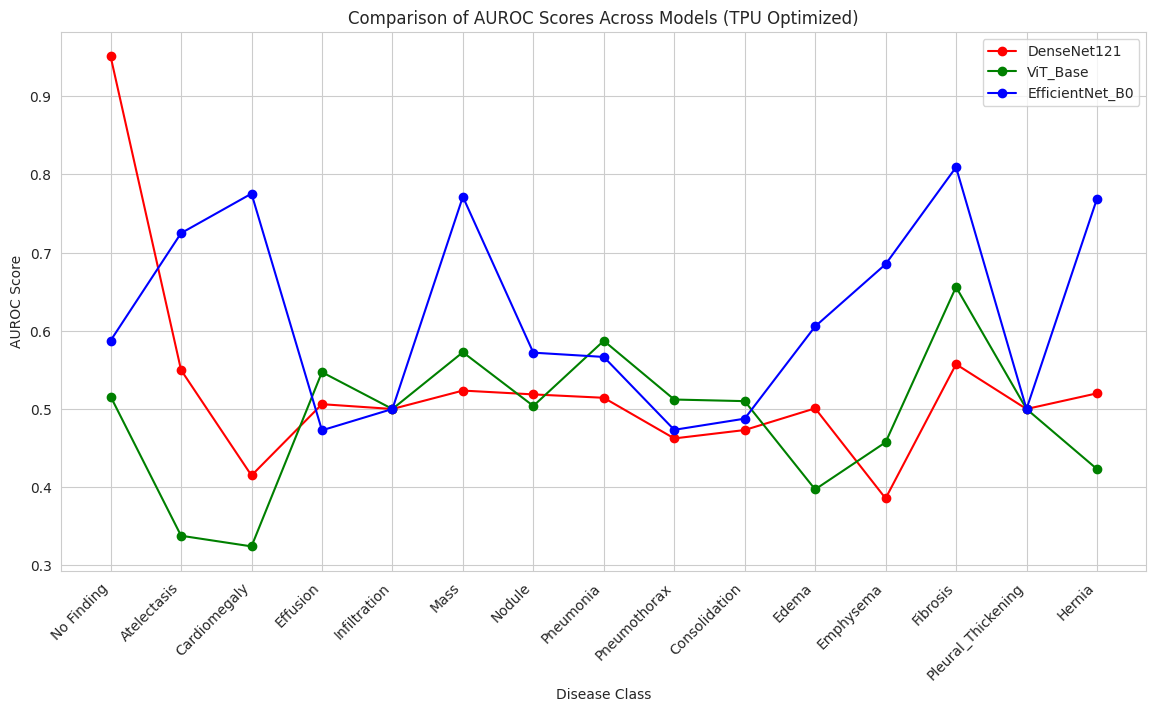

In [25]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from torchvision import transforms, models
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from datasets import load_dataset
import torch_xla.core.xla_model as xm
import torch_xla.distributed.parallel_loader as pl
import os
import time
from threading import Thread
import re
import seaborn as sns

def keep_colab_alive():
    while True:
        time.sleep(60)
        print("✅ Keeping Google Colab session alive...")

keep_alive_thread = Thread(target=keep_colab_alive, daemon=True)
keep_alive_thread.start()
device = xm.xla_device()
num_workers = 8 
print("📂 Loading NLMCXR dataset from Hugging Face...")
nlmcxr_data = load_dataset("Fakhraddin/NLMCXR", split="validation")

classes = [
    "No Finding", "Atelectasis", "Cardiomegaly", "Effusion", "Infiltration",
    "Mass", "Nodule", "Pneumonia", "Pneumothorax", "Consolidation",
    "Edema", "Emphysema", "Fibrosis", "Pleural_Thickening", "Hernia"
]

def extract_labels(row):
    labels_array = np.zeros(len(classes)) 

    text_report = row.get("text", "").lower()  

    found_labels = 0

    for i, disease in enumerate(classes):
        # Use regex to find disease names in the report text
        pattern = re.compile(rf"\b{disease.lower()}\b")
        if pattern.search(text_report): 
            labels_array[i] = 1
            found_labels += 1

    if found_labels == 0:
        print(f"⚠ No valid labels found in report: {text_report[:100]}...")

    return labels_array

# Extract labels 
actual_labels = np.array([extract_labels(row) for row in nlmcxr_data])
print(f"✅ Loaded {len(actual_labels)} structured ground truth labels.")

# Define Image Preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])


class NLMCXRDataset(Dataset):
    def __init__(self):
        self.dataset = nlmcxr_data["image"] 
        print(f"✅ Found {len(self.dataset)} images in Hugging Face dataset")

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        image = self.dataset[idx]  
        image = image.convert("RGB") 
        image = transform(image)  
        return image, idx  

nlmcxr_dataset = NLMCXRDataset()
nlmcxr_loader = DataLoader(nlmcxr_dataset, batch_size=32, shuffle=False, num_workers=num_workers, pin_memory=True)

# Compute AUROC 
def evaluate_auroc(model, data_loader):
    all_preds = []

    model.eval()
    with torch.no_grad():
        for images, _ in pl.MpDeviceLoader(data_loader, device): 
            images = images.to(device)
            outputs = torch.sigmoid(model(images)).cpu().numpy()
            all_preds.append(outputs)

    return np.vstack(all_preds)  

model_paths = {
    "DenseNet121": "/content/DenseNet121_pruned_quantized.pth",
    "ViT_Base": "/content/ViT_Base_optimized_trt.pth",
    "EfficientNet_B0": "/content/EfficientNet_B0_best_93.44.pth",
}

def load_model(model_name, model_path):
    print(f"🔹 Loading {model_name} from {model_path}...")

    try:
        if "DenseNet121" in model_name:
            model = models.densenet121(weights=None)
            model.classifier = nn.Linear(model.classifier.in_features, len(classes))
        elif "ViT" in model_name:
            model = models.vit_b_16(weights=None)
            model.heads.head = nn.Linear(model.heads.head.in_features, len(classes))
        elif "EfficientNet_B0" in model_name:
            model = models.efficientnet_b0(weights=None)
            model.classifier[-1] = nn.Linear(model.classifier[-1].in_features, len(classes))
        else:
            raise ValueError(f"❌ Unknown model name: {model_name}")


        state_dict = torch.load(model_path, map_location="cpu")
        model.load_state_dict(state_dict)
        model.to(device)
        model.eval()

        print(f"✅ Successfully loaded {model_name} (PyTorch Model).")
        return model

    except Exception as e:
        print(f"🚨 Error loading {model_name}: {e}")
        raise e

models_dict = {name: load_model(name, path) for name, path in model_paths.items()}
model_aucs = {}

for model_name, model in models_dict.items():
    print(f"🟢 Evaluating {model_name} on NLMCXR...")
    preds = evaluate_auroc(model, nlmcxr_loader)

    aucs = []
    for i in range(len(classes)):
        try:
            unique_labels = np.unique(actual_labels[:, i])
            if len(unique_labels) < 2:
                print(f"⚠ Warning: Only one class in {classes[i]}. Assigning neutral AUROC (0.5).")
                aucs.append(0.5) 
            else:
                aucs.append(roc_auc_score(actual_labels[:, i], preds[:, i]))
        except Exception as e:
            print(f"🚨 Error computing ROC AUC for {classes[i]}: {e}")
            aucs.append(0.5)  
    model_aucs[model_name] = aucs
    print(f"✅ AUROC Scores for {model_name}: {aucs}")



plt.figure(figsize=(14, 7))
sns.set_style("whitegrid") 

colors = ["r", "g", "b", "purple", "orange", "cyan"] 

for idx, (model_name, aucs) in enumerate(model_aucs.items()):
    plt.plot(range(len(classes)), aucs, label=model_name, color=colors[idx % len(colors)], marker='o')

plt.xlabel("Disease Class")
plt.ylabel("AUROC Score")
plt.title("Comparison of AUROC Scores Across Models (TPU Optimized)")
plt.xticks(range(len(classes)), classes, rotation=45, ha="right")
plt.legend()
plt.grid(True)
plt.show()


In [27]:
import numpy as np
import pandas as pd
auroc_scores = {
    "DenseNet121": [0.951, 0.550, 0.415, 0.506, 0.5, 0.524, 0.519, 0.514, 0.462, 0.473, 0.501, 0.386, 0.557, 0.5, 0.520],
    "ViT_Base": [0.516, 0.338, 0.324, 0.547, 0.5, 0.573, 0.504, 0.587, 0.512, 0.510, 0.397, 0.457, 0.656, 0.5, 0.423],
    "EfficientNet_B0": [0.587, 0.725, 0.776, 0.473, 0.5, 0.772, 0.572, 0.567, 0.473, 0.488, 0.606, 0.685, 0.809, 0.5, 0.769]
}

classes = [
    "No Finding", "Atelectasis", "Cardiomegaly", "Effusion", "Infiltration",
    "Mass", "Nodule", "Pneumonia", "Pneumothorax", "Consolidation",
    "Edema", "Emphysema", "Fibrosis", "Pleural_Thickening", "Hernia"
]

df = pd.DataFrame(auroc_scores, index=classes)
df['Best Model'] = df.idxmax(axis=1)  
best_model_counts = df['Best Model'].value_counts()
best_model = best_model_counts.idxmax()  
display(df)  
print(f"🏆 **Best Overall Model:** {best_model} ✅")
print(f"🔥 Model Performance Breakdown:")
print(best_model_counts)

,DenseNet121,ViT_Base,EfficientNet_B0,Best Model
No Finding,0.951,0.516,0.587,DenseNet121
Atelectasis,0.550,0.338,0.725,EfficientNet_B0
Cardiomegaly,0.415,0.324,0.776,EfficientNet_B0
Effusion,0.506,0.547,0.473,ViT_Base
Infiltration,0.500,0.500,0.500,DenseNet121
Mass,0.524,0.573,0.772,EfficientNet_B0
Nodule,0.519,0.504,0.572,EfficientNet_B0
Pneumonia,0.514,0.587,0.567,ViT_Base
Pneumothorax,0.462,0.512,0.473,ViT_Base
Consolidation,0.473,0.510,0.488,ViT_Base


🏆 **Best Overall Model:** EfficientNet_B0 ✅
🔥 Model Performance Breakdown:
Best Model
EfficientNet_B0    8
ViT_Base           4
DenseNet121        3
Name: count, dtype: int64
